In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from sympy import Symbol, cancel
import random as rd
from prettytable import PrettyTable
plt=reload(plt)

## Исходная функция

In [2]:
def f(x):
    return x**2 + np.sin(x)

## 1.1. Нормальные уравнения

Для построения многочлена МНК степени $n$ (то есть $a_0 + a_1x + \dots + a_n x^n$) рассмотрим
![image](./images/60.png)
Из матана известно, что необходимым условием минимума $g(a_0,\dots,a_n)$ является условие

![image](./images/61.png)

Собираем коэффициенты при $a_i$ и переписываем систему в матричном виде

![image](./images/62.png)
которую можно снова переписать:

## $$E^T E a = E^T f$$
![image](./images/63.png)

Важно: если хотя бы $n+1$ точки из $x_1,\dots,x_m$ различны  $\Rightarrow rang\;E = n+1 \Rightarrow$ у системы $\exists !$ решение $\Rightarrow \exists !$ точка минимума у $g(a_0,\dots,a_n) \Rightarrow$ у МНК $\exists !$ решение

In [3]:
def least_squares(a, b, m, poly_degree, figure=None, arg=None, show_info=None):
    rd.seed(0)
    fun_vals = []
    x, y = [], []
    interval = np.linspace(a, b, m)
    eps = 0.3
    # Генерируем приближенные значения функции f_i
    for i in interval:
        fun_vals.append(f(i) + ((-1)*(rd.randint(0, 17))%5)*(-1)**(rd.randint(-1, 1)))
        x.append(i)

    x = np.array(x, float)    
    y = np.array(fun_vals, float)
    n = poly_degree # Степень полинома МНК    
    
    pts = len(x)
    polyval = []

    if n+1 > pts:
        print('Внимание: Степень многочлена должна быть меньше числа точек из входных данных')
        print('Проверьте правильность введенных данных')
        sys.exit()

    # Реализация МНК
    matrixA = np.zeros((pts, n + 1)) # матрица А (матрица Вандермонда E в обозначениях выше)
    matrixB = np.zeros((pts, 1)) # матрица В (f в обозначениях выше)
    
    for i in range(pts):
        matrixB[i][0] = y[i]
        for j in range(n + 1):
            matrixA[i][j] = (x[i])**j
    
    if m <= 3:
        print('matrixA:\n', matrixA)
        print('matrixB:\n', matrixB)
    
    # Нормальные уравнения (A^T) A x = (A^T) b
    At = np.transpose(matrixA) 
    AtA = np.dot(At, matrixA) 
    AtB = np.dot(At, matrixB) 
    coeff = np.linalg.solve(AtA, AtB) 
    
    for i in range(pts):
        yval = 0
        for j in range(n + 1):
            yval = yval + coeff[j, 0]*(x[i])**j 
        polyval.append(yval)
    
    error = y - polyval
    sumval = np.sum(error**2)
    stddev = (sumval/(pts - (n + 1)))**0.5
    
    # Коэффициенты корреляции
    ymean = np.sum(y)/pts
    sumfit = np.sum((y - ymean)**2)
    rvalue = ((sumfit - sumval)/sumfit)**0.5
    
    # Визуализация
    if figure == True and arg==None:
        plt.figure(figsize=(10, 7), dpi=70)
        plt.plot(x, y, 'r.', label='Входные данные')
        
        def approximation(ar):
            f = 0
            for i in range(len(coeff)):
                f += coeff[i] * ar**i
            return f
        
        plt.plot(x, approximation(x), 'b-', label='Аппроксимирующий полином МНК')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Полином степени ' + str(n))
        plt.legend(loc='best', )
    
        if show_info != None:
            print('\nСтепень многочлена: ', n)
            print('\nКоэффициенты многочлена:')
            num = 0
            for i in coeff.flatten():
                print('a_{0} = {1}'.format(num, i))
                num += 1        
            print('\nСтандартное отклонение: ', stddev)
            print('Коэффициент корреляции: ', rvalue)
            print('-----------------------------------')
    
    elif figure == None and arg!=None:
        # Полином, полученный с помощью МНК     
        function = 0
        for i in range(len(coeff)):
            function += coeff[i] * arg**i
        return function

## Результаты аппроксимации полиномами степени $n=\overline{1,5}$


Степень многочлена:  1

Коэффициенты многочлена:
a_0 = 7.731157484696723
a_1 = -0.03020036143446043

Стандартное отклонение:  7.9960961281128435
Коэффициент корреляции:  0.010938716948365942
-----------------------------------

Степень многочлена:  2

Коэффициенты многочлена:
a_0 = -0.7376682796475262
a_1 = -0.030200361434463564
a_2 = 1.0128771979052655

Стандартное отклонение:  2.52586586822137
Коэффициент корреляции:  0.9488909032763052
-----------------------------------

Степень многочлена:  3

Коэффициенты многочлена:
a_0 = -0.7376682796475248
a_1 = 0.4835536159719955
a_2 = 1.0128771979052653
a_3 = -0.03413641400405654

Стандартное отклонение:  2.442853957292983
Коэффициент корреляции:  0.9523599496368372
-----------------------------------

Степень многочлена:  4

Коэффициенты многочлена:
a_0 = -0.5932199278187216
a_1 = 0.48355361597199764
a_2 = 0.9552893879963139
a_3 = -0.03413641400405666
a_4 = 0.002678512731764223

Стандартное отклонение:  2.4415037715887875
Коэффициент корре

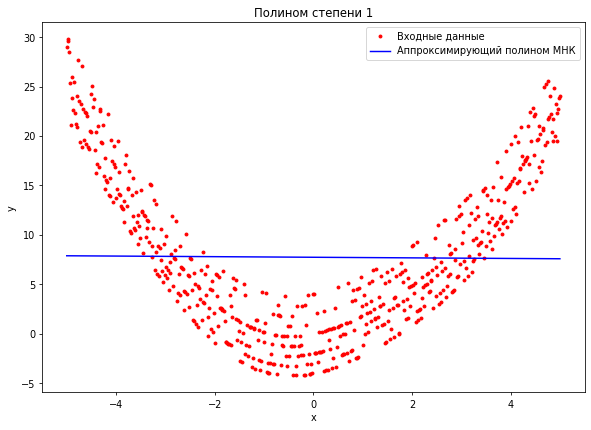

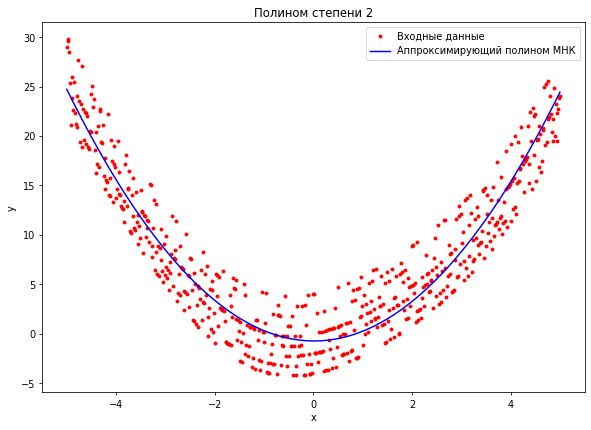

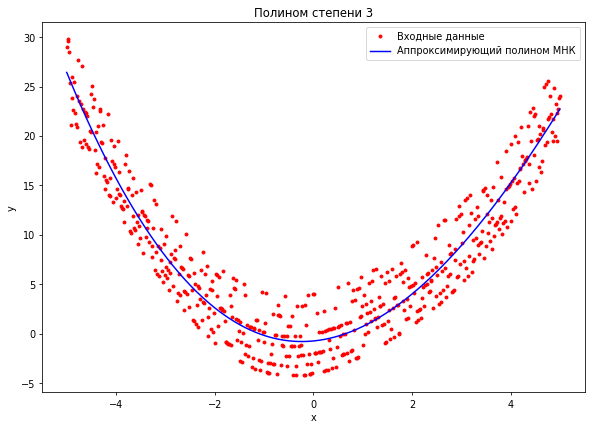

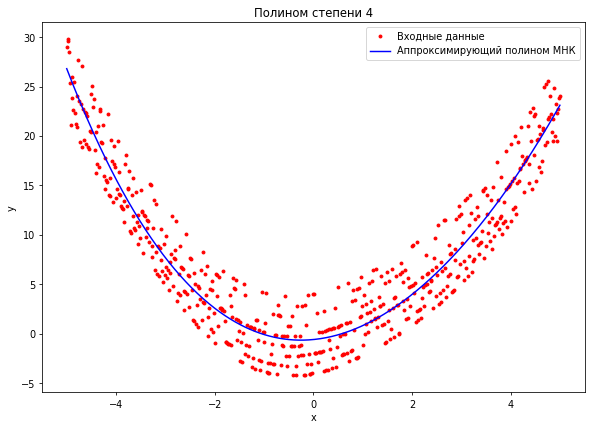

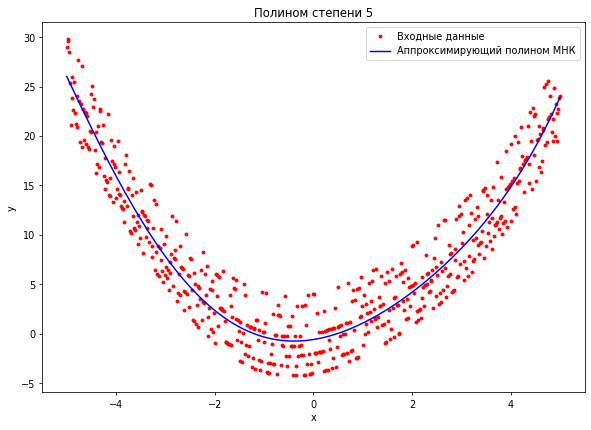

In [4]:
for i in range(1, 6):
    least_squares(a=-5, b=5, m=600, poly_degree=i, figure=1, show_info=1)

## 1.2. Обобщение МНК

![img](./images/20.png)

Приравнивая частные производные к нулю и объединяя коэффициенты при $a_i$, приходим к $\textbf{системе линейных уравнений}$, которую можно записать в виде:

![image](./images/21.png)

![image](./images/22.png)

У $(5.3.35) \; \exists !$ решение $\Leftrightarrow E: rang \; E = n + 1$. При $n \geq 5$ нормальные уравнения становятся очень плохо обусловленными, поэтому рассмотрим другой МНК - с помощью $\textbf{ортогональных многочленов}$

# 2.1. Ортогональные многочлены

![image](./images/30.png)

Если подставить $q_k(x)$ в уравнения $(5.2.35)$, получим

![image](./images/31.png)

то есть элементы, лежащие вне диагонали, зануляются

![image](images/311.png)

$(5.2.39)$ совпадает с полиномом МНК, полученным из нормальных уравнений, так как предполагается, что среди $x_1,\dots,x_m$ имеется $\geq n+1$ различных точки, так что у задачи $\exists !$ решение.
Итак, $\exists !$ полином $$p(x) = a_0 + a_1x +\dots+a_nx^n \; :\; (deg(p(x))\leq n) \; \& \; \left(\displaystyle\sum_{i=1}^{n}(p(x_i)-f_i)^2 \to \displaystyle\min_{a_0,\dots,a_n}\right)$$

Отрогональные полиномы позволяют значительно упростить систему, но теперь нужно как-то искать эти $q_i(x)$

## 2.2. Построение ортогональных полиномов

![image](./images/40.png)

При выполнении $(5.2.46)$ полиномы $q_{j+1}(x) \; \bot \; q_k(x) \; \forall k<j-1 \Rightarrow$ имеем алгоритм!!

![image](./images/41.png)

![image](./images/42.png)

In [17]:
eps = 0.3 # <--- Разброс
q = 3 # <--- Кол-во измерений
m = 55 # <--- Кол-во точек

In [18]:
[a, b] = [-3, 3]
t = np.linspace(a, b, m)
xx = np.sort(np.resize(t, q*m))
fun_val = np.zeros((q*m))

for j in range (m):
    fun_val[q*j:q*(j+1)] = [f(xx[q*j]) + rd.uniform(-eps, eps) for i in range(q)]

In [19]:
def build_E(x, n):
    m = len(x)
    E = np.zeros((m, n+1))
    for i in range(m):
        for j in range(n+1):
            E[i,j] = x[i]**j
    return E

def build_fa(x, a):
    n = len(a) - 1
    fa = a[n] * x**n
    for i in range(n):
        fa += a[i]*x**i
    return fa

def funnn(x, f, a):
    m = len(x)  
    er = 0
    for i in range(m):
        er += (f[i] - build_fa(x[i], a))**2
    return(er)

In [20]:
def build_q_orthogonal(n, x, t, f):
    m = len(t)
    Q = np.zeros((n+1,m))
    qx = np.zeros(n+1)
    qx[0] = 1
    qx[1] = x*qx[0] - sum(t)/m
    for j in range (m):
        Q[0,j] = 1
        Q[1,j] = t[j] - sum(t)/m
    for i in range(2,n+1):
        ai = sum(t*Q[i-1]*Q[i-1])/sum(Q[i-1]*Q[i-1])
        bi = sum(t*Q[i-1]*Q[i-2])/sum(Q[i-2]*Q[i-2])
        qx[i] = x*qx[i-1] - ai*qx[i-1]-bi*qx[i-2]
        for j in range (m):
            Q[i,j] = t[j]*Q[i-1,j] - ai*Q[i-1,j] - bi*Q[i-2,j]
    ak = np.zeros(n+1) 
    for i in range(n+1):
        ak[i] = sum(Q[i]*f)/sum(Q[i]*Q[i])
    return sum(ak*qx)

def fun(x, f, n):
    m = len(x)  
    er = 0
    for i in range(m):
        er += (f[i] - build_q_orthogonal(n,x[i],x,f))**2
    return(er)

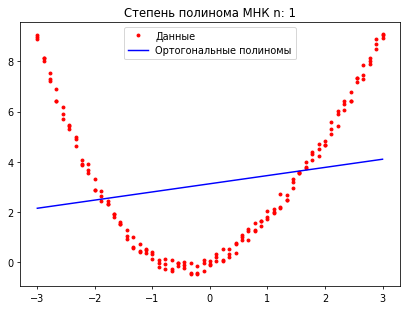

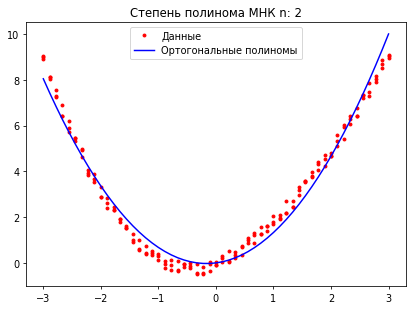

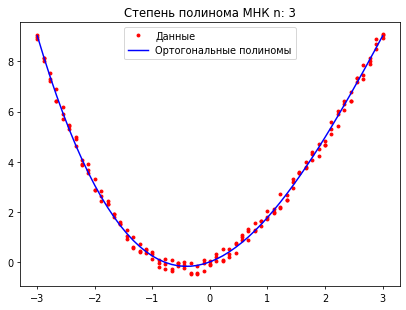

In [25]:
for i in range(1, 4):
    plt.figure(figsize = (7, 5), dpi=70)
    plt.title(f'Степень полинома МНК n: {i}')
    plt.plot(xx, fun_val, 'r.', label='Данные')
    fq = [build_q_orthogonal(n=i, x=n, t=xx, f=fun_val) for n in xx]
    plt.plot(xx, fq, 'b-', label='Ортогональные полиномы')
    plt.legend()    
plt.show()

In [24]:
table = PrettyTable()
table.field_names = ["Степень", "Норм. ур-я", "Ортог. пол-мы"]
for i in range(1, 9):
    E = build_E(xx, i)
    a = np.linalg.solve(E.T@E, E.T@fun_val)
    table.add_row([i, funnn(xx, fun_val, a), fun(xx, fun_val, i)])
print(table.get_string(title='Сумма квадратов ошибок'))

+---------------------------------------------------+
|               Сумма квадратов ошибок              |
+---------+--------------------+--------------------+
| Степень |     Норм. ур-я     |   Ортог. пол-мы    |
+---------+--------------------+--------------------+
|    1    | 1312.2585253088612 | 1312.2585253088614 |
|    2    | 33.633981227248725 | 33.633981227248725 |
|    3    | 5.444297077468413  | 5.444297077468407  |
|    4    | 5.432121649194401  |  5.4321216491944   |
|    5    | 5.1363726277984965 | 5.136372627798496  |
|    6    |  5.12977971046022  | 5.129779710460221  |
|    7    | 5.054797700949613  | 5.054797700949611  |
|    8    | 5.054729979825395  | 5.054729979825394  |
+---------+--------------------+--------------------+


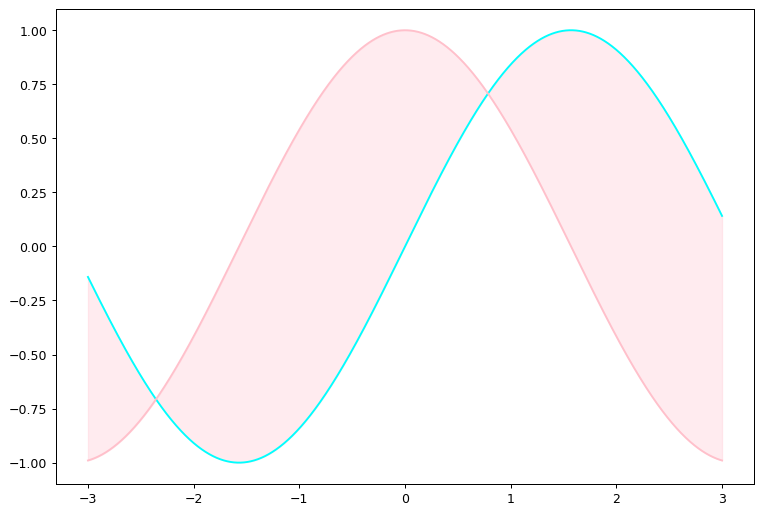

In [87]:
x = np.linspace(-3, 3, 10000)
y = np.sin(x)
g = np.cos(x)
plt.figure(figsize=(10, 7), dpi=90)
plt.plot(x, y, 'aqua')
plt.plot(x, g, 'pink')
plt.fill_between(x, y, g, alpha=0.3, color='pink')